# Proyecto de laboratorio i2 - Materiales Ohmnicos y no Ohmnicos
Integrantes:
- Nicolas Mantilla Molina - 2210707
- Santiago Montes Camacho - 2210718

In [1]:
#Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Fase 1: Ley de Ohm con resistencia constante
Se determinará la relación entre voltaje y corriente manteniendo la resistencia constante con un valor de $90.8 \Omega$. 

La regresion que ajusta los datos es: V =  89.81 I +  0.059


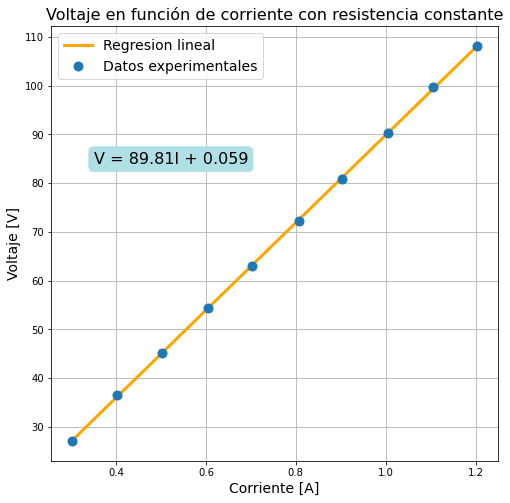

In [2]:
#Definimos las constantes
R_teo = 90.8 #Ohms

#Importamos los datos de la fase 1
fase1 = pd.read_csv('../data/fase1.csv')

#Graficamos y analizamos mediante una regresion lineal
plt.figure(figsize=(8,8))

reg1 = np.polyfit(fase1['I'],fase1['V'],1)
print("La regresion que ajusta los datos es: V = ",round(reg1[0], 3),"I + ",round(reg1[1],3))
plt.plot(fase1['I'],np.polyval(reg1,fase1['I']), color="orange", label='Regresion lineal', linewidth=3)

plt.plot(fase1['I'],fase1['V'],"o", label='Datos experimentales', markersize=9)
plt.xlabel('Corriente [A]', fontsize=14)
plt.ylabel('Voltaje [V]', fontsize=14)
plt.title('Voltaje en función de corriente con resistencia constante', fontsize=16)
plt.text(0.35, 84, "V = "+str(round(reg1[0], 3))+"I + "+str(round(reg1[1],3)), fontsize=16, bbox={"boxstyle" : "round", "color":"powderblue"})
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [3]:
#Hallamos entonces la resistencia y su error relativo
R_exp = reg1[0]
print("La resistencia experimental es:",round(R_exp, 3),"Ohms")
print("El error relativo es:",round(abs((R_teo-R_exp)/R_teo)*100, 3),"%")

#Hallamos el coeficiente de correlacion y determinacion
r = np.corrcoef(fase1['I'],fase1['V'])[0,1]
print("El coeficiente de correlacion es:",r)
print("El coeficiente de determinacion es:",r**2)
MSE = np.mean((fase1['V']-np.polyval(reg1,fase1['I']))**2)
print("El error cuadratico medio es:",round(MSE,3))

La resistencia experimental es: 89.81 Ohms
El error relativo es: 1.09 %
El coeficiente de correlacion es: 0.9999749724515313
El coeficiente de determinacion es: 0.9999499455294408
El error cuadratico medio es: 0.033


In [5]:
#Calculamos el pomedio y la desviación de las resistencias de la fase 1
print("El promedio de las resistencias de la fase 1 es:",round(np.mean(fase1.V/fase1.I),3),"Ohms")
print("La desviacion de las resistencias de la fase 1 es:",round(np.std(fase1.V/fase1.I),3),"Ohms")

El promedio de las resistencias de la fase 1 es: 89.933 Ohms
La desviacion de las resistencias de la fase 1 es: 0.312 Ohms


## Fase 2: Ley de Ohm con voltaje constante
Se medirá la relación existente entre la corriente y la resistencia con un voltaje constante con valor de $53.2V$.

La regresion que ajusta los datos es: I = -0.013 R +  1.679


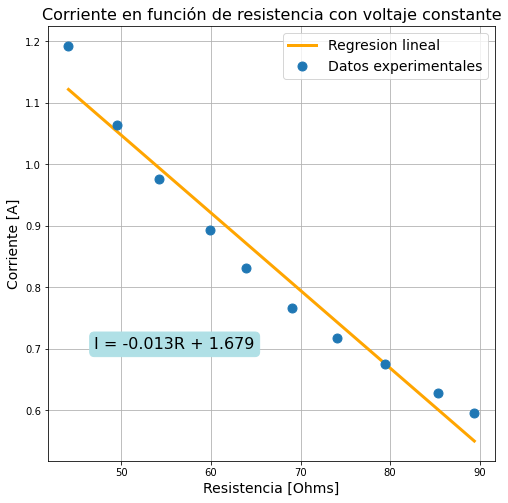

In [7]:
#Definimos el voltaje constante
V_teo = 53.2 #V

#Importamos los datos de la fase 2
fase2 = pd.read_csv('../data/fase2.csv')

#Graficamos y analizamos mediante una regresion lineal
plt.figure(figsize=(8,8))

reg2_1 = np.polyfit(fase2['R'],fase2['I'],1)
print("La regresion que ajusta los datos es: I =",round(reg2_1[0], 3),"R + ",round(reg2_1[1],3))
plt.plot(fase2['R'],np.polyval(reg2_1,fase2['R']), color="orange", label='Regresion lineal', linewidth=3)

plt.plot(fase2['R'],fase2['I'],"o", label='Datos experimentales', markersize=9)
plt.xlabel('Resistencia [Ohms]', fontsize=14)
plt.ylabel('Corriente [A]', fontsize=14)
plt.title('Corriente en función de resistencia con voltaje constante', fontsize=16)
plt.text(47, 0.7, "I = "+str(round(reg2_1[0], 3))+"R + "+str(round(reg2_1[1],3)), fontsize=16, bbox={"boxstyle" : "round", "color":"powderblue"})
plt.legend(fontsize=14)
plt.grid()
plt.show()

La regresion que ajusta los datos es: I = 51.767 (1/R) +  0.021


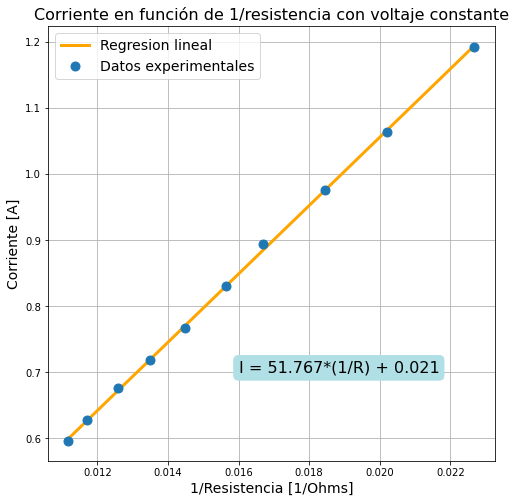

In [8]:
#Realizamos otro ajuste lineal ahora entre I y 1/R
plt.figure(figsize=(8,8))

reg2_2 = np.polyfit(1/fase2['R'],fase2['I'],1)
print("La regresion que ajusta los datos es: I =",round(reg2_2[0], 3),"(1/R) + ",round(reg2_2[1],3))
plt.plot(1/fase2['R'],np.polyval(reg2_2,1/fase2['R']), color="orange", label='Regresion lineal', linewidth=3)

plt.plot(1/fase2['R'],fase2['I'],"o", label='Datos experimentales', markersize=9)
plt.xlabel('1/Resistencia [1/Ohms]', fontsize=14)
plt.ylabel('Corriente [A]', fontsize=14)
plt.title('Corriente en función de 1/resistencia con voltaje constante', fontsize=16)
plt.text(0.016, 0.7, "I = "+str(round(reg2_2[0], 3))+"*(1/R) + "+str(round(reg2_2[1],3)), fontsize=16, bbox={"boxstyle" : "round", "color":"powderblue"})
plt.legend(fontsize=14)
plt.grid()
plt.show()


In [9]:
#Hallamos ahora el voltaje y su error relativo
V_exp = reg2_2[0]
print("El voltaje experimental es:",round(V_exp, 3),"V")
print("El error relativo es:",round(abs((V_teo-V_exp)/V_teo)*100, 3),"%")

#Hallamos el coeficiente de correlacion y determinacion
r = np.corrcoef(1/fase2['R'],fase2['I'])[0,1]
print("El coeficiente de correlacion es:",r)
print("El coeficiente de determinacion es:",r**2)
MSE2 = np.mean((fase2['I']-np.polyval(reg2_2,1/fase2['R']))**2)
print("El error cuadratico medio es:",MSE2)

El voltaje experimental es: 51.767 V
El error relativo es: 2.693 %
El coeficiente de correlacion es: 0.9998076835134686
El coeficiente de determinacion es: 0.9996154040125682
El error cuadratico medio es: 1.3366329712349854e-05


In [19]:
#Hallamos el promedio y la desviacion de los voltajes de la fase 2
print("El promedio de los voltajes de la fase 2 es:",round(np.mean(fase2.I*fase2.R),3),"V")
print("La desviacion de los voltajes de la fase 2 es:",round(np.std(fase2.I*fase2.R),3),"V")

El promedio de los voltajes de la fase 2 es: 53.148 V
La desviacion de los voltajes de la fase 2 es: 0.356 V


## Fase 3: Materiales no Ohmnicos
En esta fase se analizará el comportamiento eléctrico de un material no óhmico, para esto se utilizará un experimento similar al de la fase uno, con una pequeña modificación: en lugar de una resistencia nominal se utilizará un bombillo de luz.

La regresion que ajusta los datos es: V = 347.617 I +  -46.158


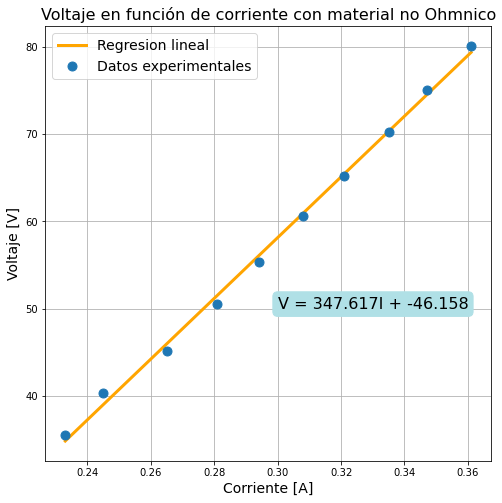

In [30]:
#Importamos los datos de la fase 3
fase3 = pd.read_csv('../data/fase3.csv')

#Graficamos y analizamos mediante una regresion lineal
plt.figure(figsize=(8,8))

reg3 = np.polyfit(fase3['I'],fase3['V'],1)
print("La regresion que ajusta los datos es: V =",round(reg3[0], 3),"I + ",round(reg3[1],3))
plt.plot(fase3['I'],np.polyval(reg3,fase3['I']), color="orange", label='Regresion lineal', linewidth=3)

plt.plot(fase3['I'],fase3['V'],"o", label='Datos experimentales', markersize=9)
plt.xlabel('Corriente [A]', fontsize=14)
plt.ylabel('Voltaje [V]', fontsize=14)
plt.title('Voltaje en función de corriente con material no Ohmnico', fontsize=16)
plt.text(0.3, 50, "V = "+str(round(reg3[0], 3))+"I + "+str(round(reg3[1],3)), fontsize=16, bbox={"boxstyle" : "round", "color":"powderblue"})
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [11]:
#Hallamos el coeficiente de correlacion y determinacion
r = np.corrcoef(fase3['I'],fase3['V'])[0,1]
print("El coeficiente de correlacion es:",r)
print("El coeficiente de determinacion es:",r**2)
MSE3 = np.mean((fase3['V']-np.polyval(reg3,fase3['I']))**2)
print("El error cuadratico medio es:",MSE3)

El coeficiente de correlacion es: 0.9986529594665955
El coeficiente de determinacion es: 0.9973077334513896
El error cuadratico medio es: 0.5475682473489826


## Extras

In [32]:
fase3["R"] = round(fase3.V/fase3.I, 2)
fase3

,V,I,R
0,80.1,0.361,221.88
1,75.0,0.347,216.14
2,70.2,0.335,209.55
3,65.2,0.321,203.12
4,60.6,0.308,196.75
5,55.3,0.294,188.10
6,50.5,0.281,179.72
7,45.1,0.265,170.19
8,40.3,0.245,164.49
9,35.5,0.233,152.36


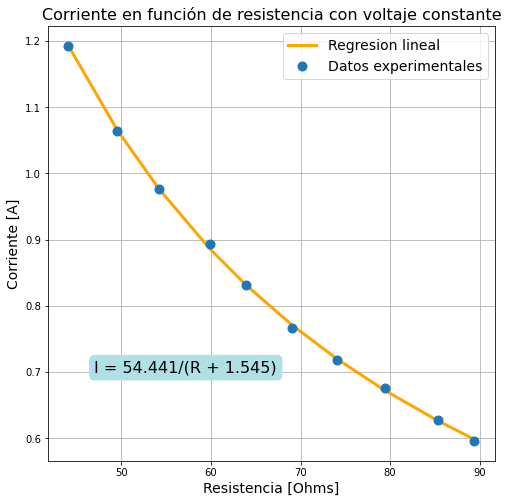

In [39]:
import scipy.optimize as opt

#Modelamos una función inversa de la forma I(R) = a/(R+b)
def func(x, a, b):
    return a/(x+b)

#Ajustamos los datos de la fase 2
popt, pcov = opt.curve_fit(func, fase2['R'], fase2['I'])

#Graficamos y analizamos mediante una regresion lineal
plt.figure(figsize=(8,8))

plt.plot(fase2['R'],func(fase2['R'],*popt), color="orange", label='Regresion lineal', linewidth=3)

plt.plot(fase2['R'],fase2['I'],"o", label='Datos experimentales', markersize=9)
plt.xlabel('Resistencia [Ohms]', fontsize=14)
plt.ylabel('Corriente [A]', fontsize=14)
plt.title('Corriente en función de resistencia con voltaje constante', fontsize=16)
plt.text(47, 0.7, "I = "+str(round(popt[0], 3))+"/(R + "+str(round(popt[1],3))+")", fontsize=16, bbox={"boxstyle" : "round", "color":"powderblue"})
plt.legend(fontsize=14)
plt.grid()
plt.show()

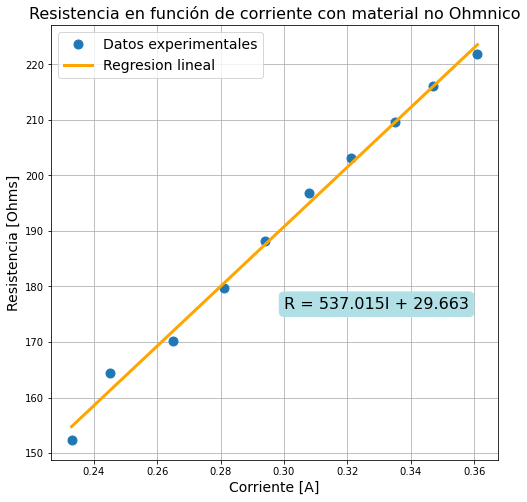

In [40]:
plt.figure(figsize=(8,8))
plt.plot(fase3.I, fase3.R, "o", label='Datos experimentales', markersize=9)
plt.xlabel('Corriente [A]', fontsize=14)
plt.ylabel('Resistencia [Ohms]', fontsize=14)
plt.title('Resistencia en función de corriente con material no Ohmnico', fontsize=16)

prueba = np.polyfit(fase3.I, fase3.R, 1)

plt.plot(fase3.I, np.polyval(prueba, fase3.I), color="orange", label='Regresion lineal', linewidth=3)
plt.text(0.3, 176, "R = "+str(round(prueba[0], 3))+"I + "+str(round(prueba[1],3)), fontsize=16, bbox={"boxstyle" : "round", "color":"powderblue"})
plt.legend(fontsize=14)
plt.grid()
plt.show()